## Exploring how the scypy function cross correlation works

Useful links:
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html
    
A short explanation of cross correlation and convolution (slides)

https://users.cs.northwestern.edu/~pardo/courses/eecs352/lectures/MPM16-topic8-Convolution.pdf

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Documentation example

In [2]:
sig = np.repeat([0., 3., 3., 0., 2., 0., 0., 1.], 128)
sig_noise = sig + np.random.randn(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='full') / 128
clock = np.arange(64, len(sig), 128)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


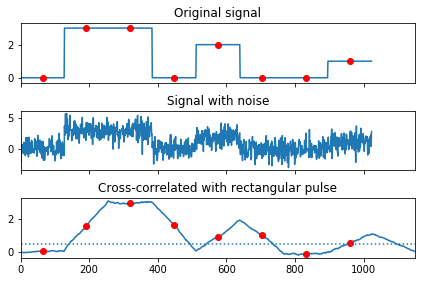

In [3]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
fig.show()

#### Example from ...

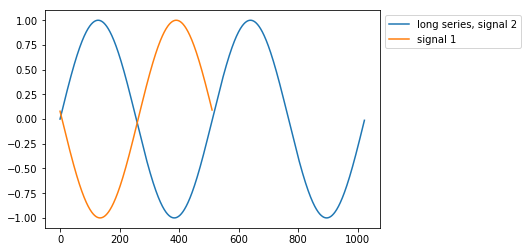

In [4]:
fig,ax = plt.subplots(1,1)
N = 1024
ix = np.arange(N)
ix2 = np.arange(int(N/2))
signal1 = np.sin(2*np.pi*ix2/float(N/2) + 512) # shorter, translated series
signal2 = np.sin(2*np.pi*ix/float(N/2))
ax.plot(signal2, label='long series, signal 2')
ax.plot(signal1, label='signal 1')
ax.legend(bbox_to_anchor=(1,1))

correlation_array = signal.correlate(signal1, signal2, mode='same')
best_shift = np.argmax(correlation_array)

The output of the corss-correlation fucntion is the same size of the smaller array.

The index of max cross-correlation is 262
The shape of the cross-correlation function output is
(512,)


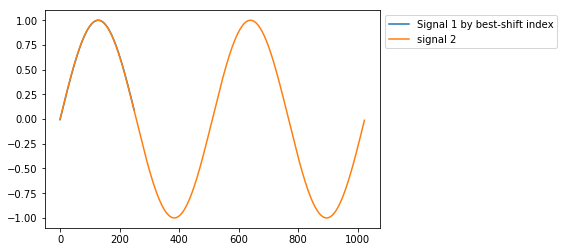

In [5]:
print('The index of max cross-correlation is %d' %best_shift)
print('The shape of the cross-correlation function output is')
print(np.shape(correlation_array))
signal3 = signal1[best_shift:]

fig,ax = plt.subplots(1,1)
ax.plot(signal3, label='Signal 1 by best-shift index')
ax.plot(signal2, label='signal 2')
ax.legend(bbox_to_anchor=(1,1))


#### Locate a pulse

(512,) (896,) (896,)


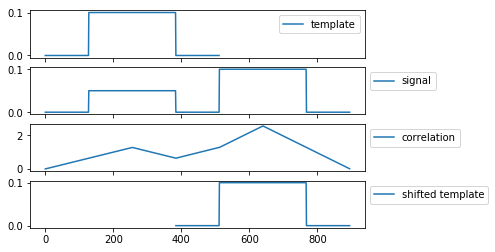

In [78]:

pulse = np.repeat([0., 0.1, 0.1, 0.], 128) # template
timeseries = np.repeat([0.,.05, .05, 0., 0.1, 0.1, 0.], 128) # mock timeseries
corr_array = signal.correlate(timeseries,pulse,  mode='same') # x-correlation
print(np.shape(pulse), np.shape(timeseries), np.shape(corr_array))

loc = np.where(corr_array == np.max(corr_array)) # grab location of max correlation 
loc_med = np.median(loc)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True)
ax0.plot(pulse, label='template')
ax1.plot(timeseries, label='signal')
ax2.plot(corr_array, label='correlation')
ax3.plot(np.arange(len(pulse))+loc_med-len(pulse)/2., pulse, label='shifted template')

for ax in [ax0,ax1,ax2,ax3]:
    ax.legend(bbox_to_anchor=(1,1))

In [85]:
bad = np.array([        np.nan,         np.nan, -0.19461293, -0.18424755, -0.16806411,
      -0.15555584, -0.13973267, -0.12414523, -0.10672684, -0.08705693,
      -0.10557164, -0.19042624, -0.27313521, -0.30689003, -0.24585131,
      -0.19064066, -0.18231539, -0.15914046, -0.16219412, -0.18626978,
      -0.21177898, -0.19328562, -0.1495773 , -0.12653   , -0.12596162,
      -0.13469155, -0.14057779, -0.13180524, -0.12132665, -0.10763939,
      -0.10450003, -0.09246034, -0.07469367, -0.067     , -0.069     ,
              np.nan,         np.nan,         np.nan,         np.nan,         np.nan,
              np.nan,         np.nan,         np.nan,         np.nan,         np.nan,
              np.nan,         np.nan,         np.nan,         np.nan,         np.nan,
              np.nan,         np.nan,         np.nan,         np.nan,         np.nan,
              np.nan,         np.nan,         np.nan,         np.nan,         np.nan,
              np.nan,         np.nan,         np.nan,         np.nan,         np.nan,
              np.nan,         np.nan,         np.nan,         np.nan,         np.nan,
              np.nan,         np.nan,         np.nan,         np.nan,         np.nan,
              np.nan])

good = np.array([        np.nan,         np.nan,  0.11651988,  0.11869922,  0.1366819 ,
               0.14823426,  0.21569708,  0.32249379,  0.45955832,  0.60181144,
               0.70348985,  0.80934128,  0.91615298,  0.95992051,  0.863076  ,
               0.69336652,  0.52049277,  0.38300575,  0.31645564,  0.26290439,
               0.21254273,  0.16937823,  0.13970553,  0.10487252,  0.04537953,
              -0.02918168, -0.10864066, -0.17158342, -0.21602282, -0.24900891,
              -0.27375611, -0.29035206, -0.29797157, -0.30768049, -0.31547794,
              -0.31590211,         np.nan,         np.nan,         np.nan,         np.nan,
                      np.nan,         np.nan,         np.nan,         np.nan,         np.nan,
                      np.nan,         np.nan,         np.nan,         np.nan,         np.nan,
                      np.nan,         np.nan,         np.nan,         np.nan,         np.nan,
                      np.nan,         np.nan,         np.nan,         np.nan,         np.nan,
                      np.nan,         np.nan,         np.nan,         np.nan,         np.nan,
                      np.nan,         np.nan,         np.nan,         np.nan,         np.nan,
                      np.nan,         np.nan,         np.nan,         np.nan,         np.nan,
                      np.nan])

coord = np.array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
              110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
              220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
              330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
              440., 450., 460., 470., 480., 490., 500., 510., 520., 530., 540.,
              550., 560., 570., 580., 590., 600., 610., 620., 630., 640., 650.,
              660., 670., 680., 690., 700., 710., 720., 730., 740., 750.])

(8,) (76,) (76,)


/Users/Karina/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


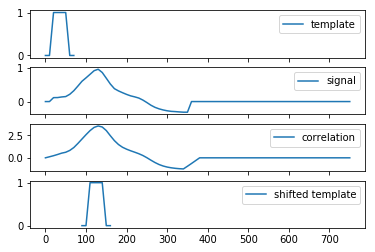

In [102]:
good[np.isnan(good)]=0
pulse = np.repeat([0., 1, 1, 0.], 2) # template
corr_array = signal.correlate(good, pulse,  mode='same') # x-correlation
print(np.shape(pulse), np.shape(good), np.shape(corr_array))

loc = np.where(corr_array == np.max(corr_array)) # grab location of max correlation 
loc_med = np.median(loc)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True)
ax0.plot(coord[:len(pulse)],pulse, label='template')
ax1.plot(coord,good, label='signal')
ax2.plot(coord,corr_array, label='correlation')
ax3.plot(coord[:len(pulse)]+coord[loc_med]-coord[len(pulse)]/2., pulse, label='shifted template')

for ax in [ax0,ax1,ax2,ax3]:
    ax.legend(bbox_to_anchor=(1,1))

(20,) (76,) (76,)


/Users/Karina/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


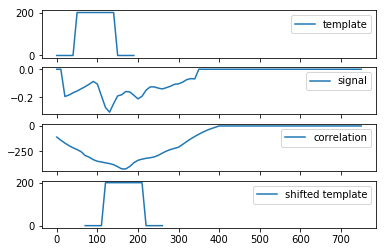

In [109]:
bad[np.isnan(bad)]=0
pulse = np.repeat([0., 200, 200, 0.], 5) # template
corr_array = signal.correlate(bad, pulse,  mode='same') # x-correlation
print(np.shape(pulse), np.shape(bad), np.shape(corr_array))

loc = np.where(np.abs(corr_array) == np.max(np.abs(corr_array))) # grab location of max correlation, later build in option to use absolute or not
loc_med = np.median(loc)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True)
ax0.plot(coord[:len(pulse)],pulse, label='template')
ax1.plot(coord,bad, label='signal')
ax2.plot(coord,corr_array, label='correlation')
ax3.plot(coord[:len(pulse)]+coord[loc_med]-coord[len(pulse)]/2., pulse, label='shifted template')

for ax in [ax0,ax1,ax2,ax3]:
    ax.legend(bbox_to_anchor=(1,1))

(5,) (76,) (76,)


/Users/Karina/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


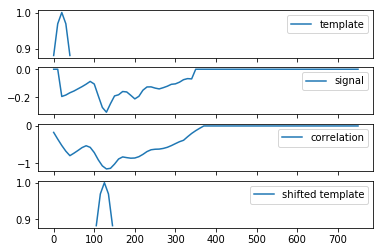

In [127]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

bad[np.isnan(bad)]=0
pulse = gaussian(np.linspace(0,1,5),0.5,1)
corr_array = signal.correlate(bad, pulse,  mode='same') # x-correlation
print(np.shape(pulse), np.shape(bad), np.shape(corr_array))

loc = np.where(np.abs(corr_array) == np.max(np.abs(corr_array))) # grab location of max correlation, later build in option to use absolute or not
loc_med = np.median(loc)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True)
ax0.plot(coord[:len(pulse)],pulse, label='template')
ax1.plot(coord,bad, label='signal')
ax2.plot(coord,corr_array, label='correlation')
ax3.plot(coord[:len(pulse)]+coord[loc_med]-coord[len(pulse)]/2., pulse, label='shifted template')

for ax in [ax0,ax1,ax2,ax3]:
    ax.legend(bbox_to_anchor=(1,1))

(5,) (76,) (76,)


/Users/Karina/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


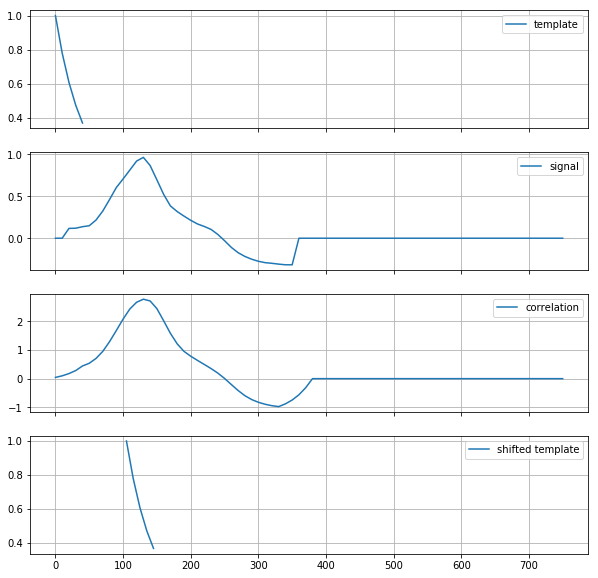

In [135]:
good[np.isnan(good)]=0
pulse = np.exp(-np.linspace(0,1,5))
corr_array = signal.correlate(good, pulse,  mode='same') # x-correlation
print(np.shape(pulse), np.shape(good), np.shape(corr_array))

loc = np.where(np.abs(corr_array) == np.max(np.abs(corr_array))) # grab location of max correlation, later build in option to use absolute or not
loc_med = np.median(loc)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True, figsize=(10,10))
ax0.plot(coord[:len(pulse)],pulse, label='template')
ax1.plot(coord,good, label='signal')
ax2.plot(coord,corr_array, label='correlation')
ax3.plot(coord[:len(pulse)]+coord[loc_med]-coord[len(pulse)]/2., pulse, label='shifted template')

for ax in [ax0,ax1,ax2,ax3]:
    ax.legend(bbox_to_anchor=(1,1))
    ax.grid()

To do's:

1. Try expo so we know it works
2. Then figure out segmenting
3. Code to fit data to exponential and gaussian. (Paige)